### Customer Segmentation using K-Nearest Neighbors (KNN) with Hyperparameter Tuning and Regularization

#### Import libraries

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#### Load dataset

In [289]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data Preprocessing

##### Data inspection

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [294]:
data.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


##### Check whether there is any missing value

In [296]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### Check whether there is any duplicate value

In [299]:
data.duplicated().sum()

0

#### As there is no duplicate or missing value so we do not need to deal with them

#### Rename the columns

In [304]:
data = data.rename(columns={'Genre' : 'Gender', 'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spending_Score'})
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Convert categorical to numeric

In [306]:
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})

#### Drop Customer ID column

In [309]:
data = data.drop(['CustomerID'], axis = 1)

#### Target Variable: Let's define 3 segments based on spending score

In [311]:
data['Segment'] = pd.cut(data['Spending_Score'], bins=[0, 40 ,70, 100], labels=[0, 1, 2])

#### Drop Original Spending_Score

In [313]:
data = data.drop(['Spending_Score'], axis=1)

- In the original dataset, Spending Score is a continuous numeric value (1–100).
- If we use it directly as the target, we’d need to apply KNN Regression, not classification.
- This categorizes customers into 3 segments based on their spending score:
  - 0: Low Spender (1–40)
  - 1: Medium Spender (41–70)
  - 2: High Spender (71–100)

Once we use it to define the new categorical Segment column, keeping the original Spending_Score would:

- Introduce data leakage (model might directly use the value to "cheat" and predict segment).
- Be redundant, since the same info is now encoded in the Segment column.

#### Feature and target split

In [318]:
X = data.drop(['Segment'], axis = 1)
y = data['Segment']

#### Standardization

In [320]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Split the dataset in train and test datasets

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

#### Train the model

In [375]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

##### Predict

In [378]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 2 0 2 1 1 1 0 0 1 1 0 2 1 0 2 1 0 1 1 1 0 2 1 1 1 1 1 2 2 2 0 1 1 0 1 2
 2 0 1]


#### Model evaulation

In [381]:
print('Base model accuracy : ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Base model accuracy :  0.825
[[10  3  3]
 [ 0 17  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       0.85      0.94      0.89        18
           2       0.60      1.00      0.75         6

    accuracy                           0.82        40
   macro avg       0.82      0.86      0.80        40
weighted avg       0.87      0.82      0.82        40



#### Hyperparameter tuning using GridSearchCV

In [437]:
param_grid = {
    'n_neighbors' : list(range(1, 21)),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [438]:
print('Best Parameters : ', grid.best_params_)

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}


#### Final model evaluation

In [440]:
best_knn = grid.best_estimator_
final_pred = best_knn.predict(X_test)
print(best_knn)
print(final_pred)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)
[1 2 0 2 1 1 1 0 0 1 1 0 2 1 0 2 1 0 1 1 1 0 2 1 1 1 1 1 2 2 0 0 0 1 0 1 2
 2 0 1]


In [444]:
print('Final Model accuracy : ', accuracy_score(y_test, final_pred))

Final Model accuracy :  0.775


In [446]:
print(grid.cv_results_['mean_test_score'])
print(confusion_matrix(y_test, final_pred))
print(classification_report(y_test, final_pred))

[0.725   0.725   0.65625 0.71875 0.70625 0.725   0.75    0.74375 0.69375
 0.73125 0.69375 0.73125 0.68125 0.725   0.6625  0.71875 0.675   0.73125
 0.64375 0.71875 0.625   0.71875 0.625   0.7125  0.625   0.70625 0.6125
 0.7125  0.5875  0.70625 0.59375 0.6875  0.5875  0.69375 0.58125 0.7
 0.56875 0.6875  0.56875 0.69375 0.6875  0.6875  0.68125 0.6875  0.6875
 0.69375 0.73125 0.73125 0.7     0.73125 0.6875  0.7125  0.7125  0.725
 0.7     0.71875 0.6875  0.725   0.66875 0.71875 0.65625 0.725   0.65
 0.73125 0.63125 0.71875 0.63125 0.71875 0.6     0.70625 0.60625 0.7
 0.58125 0.69375 0.59375 0.7     0.58125 0.7     0.5625  0.7    ]
[[10  3  3]
 [ 1 16  1]
 [ 1  0  5]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.84      0.89      0.86        18
           2       0.56      0.83      0.67         6

    accuracy                           0.78        40
   macro avg       0.74      0.78      0.75        40
we

#### Elbow Method to visualize best k

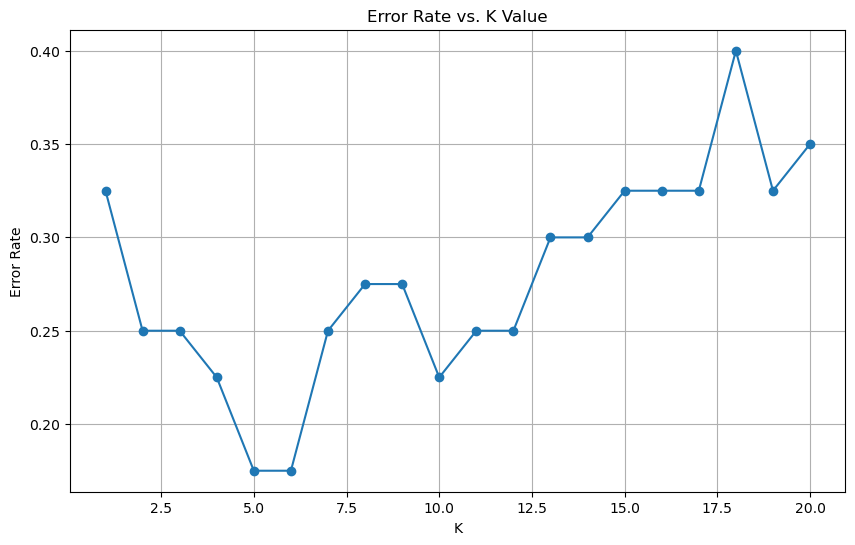

In [449]:
error_rate = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()